In [139]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [140]:
rounds = 100
vehicle_limit = 80
all_routes = [[0, 3], [0, 1], [2, 3], [2, 1]]

In [141]:
record = pd.read_csv(f'Saved_data/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_data/Utility_data/Round_{rounds}.csv')

In [142]:
record

,Vehicle_label,Road_order,Total_time,Leading_vehicles,Stopped_time,Stop_while_front,Round_number
0,0,"[0, 3]",107.50,"[-999, 16]","[0, 0]","[5.649999999999988, 0]",1
1,1,"[2, 1]",36.40,"[-999, -999]","[0, 0]","[0, 0]",1
2,2,"[2, 1]",38.10,"[1, 1]","[0, 0]","[0, 0]",1
3,3,"[2, 1]",39.90,"[2, 2]","[0, 0]","[0, 0]",1
4,4,"[0, 1]",76.75,"[0, -999]","[0, 0]","[0, 0]",1
...,...,...,...,...,...,...,...
7995,75,"[2, 1]",144.95,"[69, 62]","[13.00000000000005, 0]","[3.349999999999996, 0]",100
7996,76,"[2, 3]",177.15,"[75, 64]","[13.400000000000055, 0]","[0, 0]",100
7997,77,"[0, 1]",153.15,"[74, 74]","[6.849999999999984, 0]","[0, 0]",100
7998,78,"[0, 1]",150.20,"[77, 77]","[7.84999999999998, 0]","[0, 0]",100


In [143]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)

In [144]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(time_df.shape)
# display(time_df.head(10))

In [145]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

array([106.73571429, 112.765     , 120.62173913,  97.821875  ,
        93.76666667,  97.4575    , 117.21730769, 114.64666667,
       107.45      , 115.909375  ,  98.53461538, 115.73888889,
       112.6075    , 110.175     , 125.32884615, 111.35      ,
       107.66428571, 107.39047619, 104.14583333, 116.11590909,
       121.664     , 107.52708333, 117.86578947, 104.73809524,
       115.17666667, 105.39285714, 102.7825    , 111.74285714,
       107.97058824, 106.28913043, 113.61428571, 111.99259259,
        92.91944444, 116.54833333, 104.2725    , 119.20714286,
       106.0225    , 119.40714286, 116.2125    , 112.864     ,
        95.62352941, 110.55      , 118.80384615, 101.26666667,
       112.08863636, 115.23703704, 103.38478261, 101.69347826,
       119.19310345, 100.7775    , 112.826     , 118.276     ,
       114.02916667, 114.36964286, 111.59807692, 114.20535714,
        95.98      , 100.375     , 100.87608696, 113.76785714,
       115.05535714, 120.758     , 108.162     , 121.64

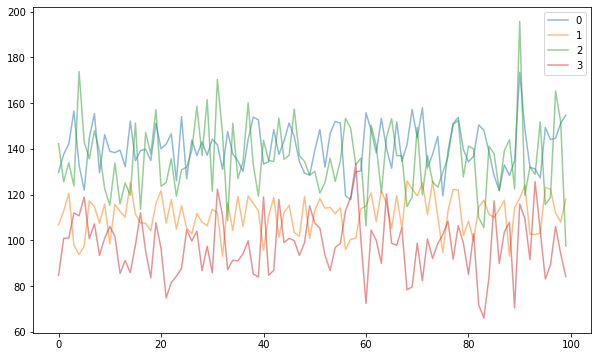

In [146]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(4):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

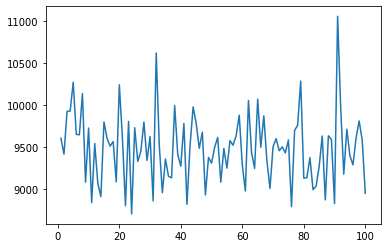

In [147]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [148]:
time_df2.Total_time[-20:].mean()

9444.98499999992

In [149]:
utility

,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,"[-3.3939085011250327, -3.213435476852882, -3.1...","[0.1923160731832756, 0.23035307885297063, 0.23...","[0, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 0, 3, 2, 2, ...",1.004567,0.859397
1,1,"[-8.790849325212022, -7.817684168897361, -7.64...","[0.04372209040569834, 0.11570208236054369, 0.1...","[3, 2, 0, 1, 3, 1, 3, 1, 3, 3, 2, 0, 3, 0, 3, ...",1.098579,1.242902
2,2,"[-4.419672953391197, -4.109604736615333, -4.04...","[0.15487595024573456, 0.21117616540591752, 0.2...","[3, 0, 1, 2, 3, 1, 3, 2, 0, 1, 3, 1, 3, 0, 0, ...",0.828359,0.999479
3,3,"[-5.49890040230658, -5.089135214884549, -4.972...","[0.12725272590600875, 0.19170165135497402, 0.2...","[3, 0, 2, 1, 0, 3, 3, 2, 0, 2, 3, 3, 3, 1, 2, ...",1.026424,1.069311
4,4,"[-5.180954868480783, -4.836158988374204, -4.74...","[0.14465857963348958, 0.2042147676847273, 0.22...","[1, 0, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 3, 2, 1, ...",1.230314,1.027700
...,...,...,...,...,...,...
75,75,"[-16.413120075133214, -14.798072779465341, -17...","[0.1335285012831323, 0.6713980925106293, 0.066...","[1, 2, 3, 0, 1, 1, 1, 1, 3, 0, 3, 3, 1, 1, 0, ...",0.783517,1.420385
76,76,"[-9.587517582953996, -8.9507860095742, -10.125...","[0.2266475226195382, 0.4284301097426042, 0.132...","[1, 3, 2, 0, 0, 1, 1, 0, 3, 0, 1, 1, 3, 3, 0, ...",0.962431,1.223712
77,77,"[-6.811765404316143, -6.425619029297551, -7.09...","[0.23975115126449634, 0.3527458728403626, 0.18...","[1, 3, 0, 2, 2, 1, 3, 3, 1, 0, 1, 3, 0, 0, 2, ...",0.777065,1.126515
78,78,"[-6.245425473525716, -6.000897777817326, -6.46...","[0.24695722742755757, 0.3153688319782377, 0.19...","[1, 0, 2, 3, 3, 2, 1, 1, 0, 3, 2, 2, 1, 2, 0, ...",1.099052,1.065012


In [150]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [151]:
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,3,2,1,3,2,1,3,3,2,...,1,2,0,0,1,2,1,1,2,3
1,3,2,0,1,3,1,3,1,3,3,...,3,3,3,3,3,3,0,3,1,3
2,3,0,1,2,3,1,3,2,0,1,...,3,3,3,3,2,2,3,3,3,1
3,3,0,2,1,0,3,3,2,0,2,...,2,0,2,2,3,0,3,3,1,0
4,1,0,3,2,1,3,1,2,3,3,...,3,2,3,1,0,1,2,2,2,1
5,2,1,0,3,3,2,1,3,3,0,...,1,3,2,2,1,3,0,3,3,2
6,0,2,3,1,3,2,1,1,3,2,...,3,3,0,0,3,3,1,3,3,3
7,3,1,2,0,3,0,2,3,3,3,...,1,3,2,2,3,3,0,1,3,1
8,0,1,3,2,3,3,3,3,3,1,...,2,0,2,1,3,2,1,1,3,1
9,1,3,0,2,0,2,0,1,0,3,...,1,2,2,1,0,0,2,1,3,2


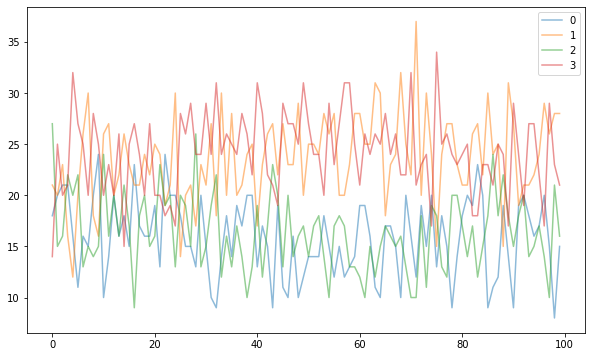

In [152]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(4):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

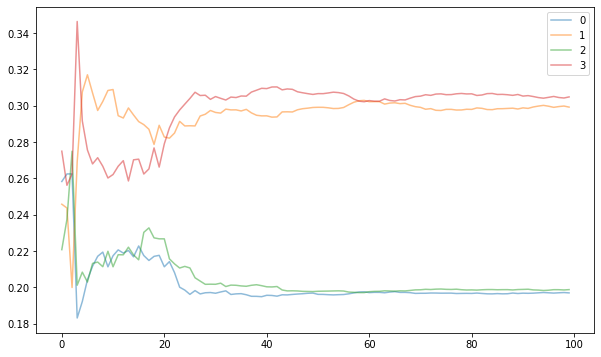

In [153]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_data/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(4):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [154]:
utility

,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,"[-3.3939085011250327, -3.213435476852882, -3.1...","[0.1923160731832756, 0.23035307885297063, 0.23...","[0, 3, 2, 1, 3, 2, 1, 3, 3, 2, 1, 0, 3, 2, 2, ...",1.004567,0.859397
1,1,"[-8.790849325212022, -7.817684168897361, -7.64...","[0.04372209040569834, 0.11570208236054369, 0.1...","[3, 2, 0, 1, 3, 1, 3, 1, 3, 3, 2, 0, 3, 0, 3, ...",1.098579,1.242902
2,2,"[-4.419672953391197, -4.109604736615333, -4.04...","[0.15487595024573456, 0.21117616540591752, 0.2...","[3, 0, 1, 2, 3, 1, 3, 2, 0, 1, 3, 1, 3, 0, 0, ...",0.828359,0.999479
3,3,"[-5.49890040230658, -5.089135214884549, -4.972...","[0.12725272590600875, 0.19170165135497402, 0.2...","[3, 0, 2, 1, 0, 3, 3, 2, 0, 2, 3, 3, 3, 1, 2, ...",1.026424,1.069311
4,4,"[-5.180954868480783, -4.836158988374204, -4.74...","[0.14465857963348958, 0.2042147676847273, 0.22...","[1, 0, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 3, 2, 1, ...",1.230314,1.027700
...,...,...,...,...,...,...
75,75,"[-16.413120075133214, -14.798072779465341, -17...","[0.1335285012831323, 0.6713980925106293, 0.066...","[1, 2, 3, 0, 1, 1, 1, 1, 3, 0, 3, 3, 1, 1, 0, ...",0.783517,1.420385
76,76,"[-9.587517582953996, -8.9507860095742, -10.125...","[0.2266475226195382, 0.4284301097426042, 0.132...","[1, 3, 2, 0, 0, 1, 1, 0, 3, 0, 1, 1, 3, 3, 0, ...",0.962431,1.223712
77,77,"[-6.811765404316143, -6.425619029297551, -7.09...","[0.23975115126449634, 0.3527458728403626, 0.18...","[1, 3, 0, 2, 2, 1, 3, 3, 1, 0, 1, 3, 0, 0, 2, ...",0.777065,1.126515
78,78,"[-6.245425473525716, -6.000897777817326, -6.46...","[0.24695722742755757, 0.3153688319782377, 0.19...","[1, 0, 2, 3, 3, 2, 1, 1, 0, 3, 2, 2, 1, 2, 0, ...",1.099052,1.065012


In [155]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [156]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(4):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [157]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [158]:
# len(utility.Eta.values), len(plot_eta_prob[1])

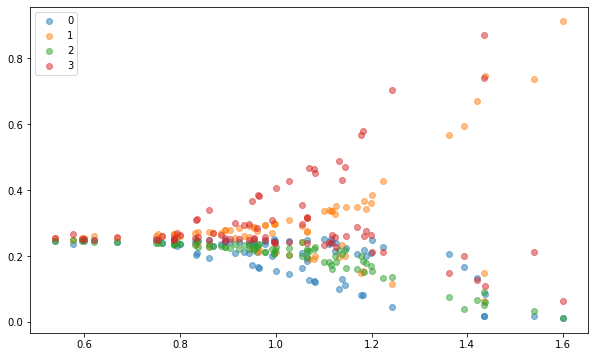

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

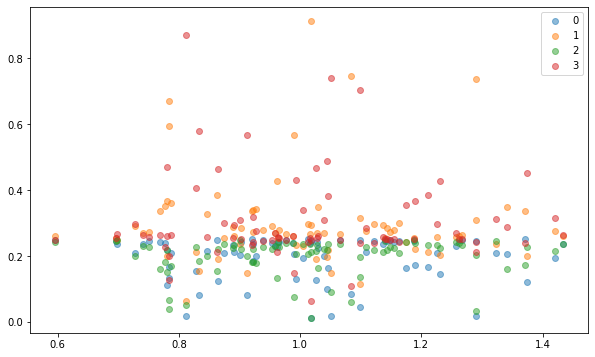

In [160]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

In [161]:
summary = pd.read_csv('Saved_data/Simulation_records/Summary.csv')

In [162]:
summary.head(20)

,Vehicle_label,Road_order,Caused_delay,Count,Total_time
0,0,0,0.934375,16,100.287500
1,0,1,1.545000,30,71.590000
2,0,2,0.000000,28,67.750000
3,0,3,0.000000,26,36.400000
4,1,0,1.581250,8,100.531250
5,1,1,0.894118,17,72.802941
6,1,2,0.000000,9,68.605556
7,1,3,0.000000,66,37.068182
8,2,0,1.117647,17,100.794118
9,2,1,1.186842,19,73.871053
